In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv
/kaggle/input/required-data/sample_submission.csv
/kaggle/input/required-data/train.csv
/kaggle/input/required-data/test.csv


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
import keras_tuner as kt
import tensorflow as tf

2024-02-06 19:52:40.307581: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 19:52:40.307719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 19:52:40.460130: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Loading Datasets

In [3]:
df=pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')
train=pd.read_csv('/kaggle/input/required-data/train.csv')
test=pd.read_csv('/kaggle/input/required-data/test.csv')
submission=pd.read_csv('/kaggle/input/required-data/sample_submission.csv')

**Notations**
* Frequent consumption of high caloric food (FAVC)
* Frequency of consumption of vegetables (FCVC)
* Number of main meals (NCP)
*  Consumption of food between meals (CAEC)
*  Consumption of water daily (CH20)
* Consumption of alcohol (CALC)
* Calories consumption monitoring (SCC)
* Physical activity frequency (FAF)
* Time using technology devices (TUE)
* Transportation used (MTRANS)

**NObesity values are:**

* Underweight Less than 18.5
* Normal 18.5 to 24.9
* Overweight 25.0 to 29.9
* Obesity I 30.0 to 34.9
* Obesity II 35.0 to 39.9
* Obesity III Higher than 40

In [4]:
train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [5]:
test

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


# Exploratory Data Analysis
**(Using df dataset)**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

* Data has no null values, even training and testing datasets have no null values

* We clearly have mixed number of categorical and numerical data

In [7]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [9]:
# Get list of neumeric variables
t = (df.dtypes == "float64") | (df.dtypes == "int32")
num_cols = list(t[t].index)
num_cols

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [10]:
# Get list of categorical variables
s = (df.dtypes == "object")
object_cols = list(s[s].index)
object_cols=object_cols[:-1]
object_cols

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

<Axes: >

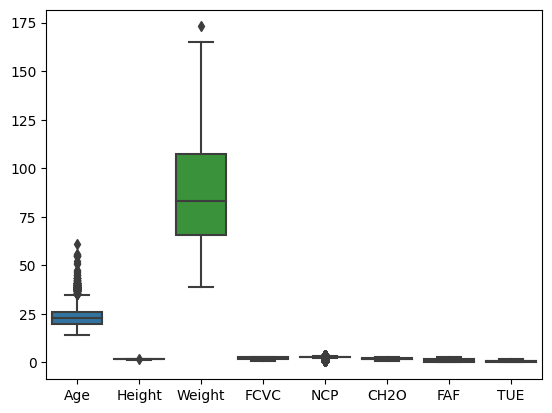

In [11]:
sns.boxplot(df)

* NOT MANY OUTLIERS IN THE DATASET, ALTHOUGH AGE COLUMN HAS SOME

In [12]:
corr=df[num_cols].corr()

<Axes: >

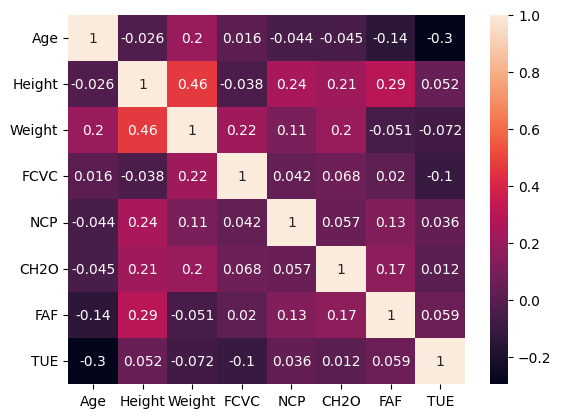

In [13]:
sns.heatmap(corr,annot=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='NCP', ylabel='Count'>

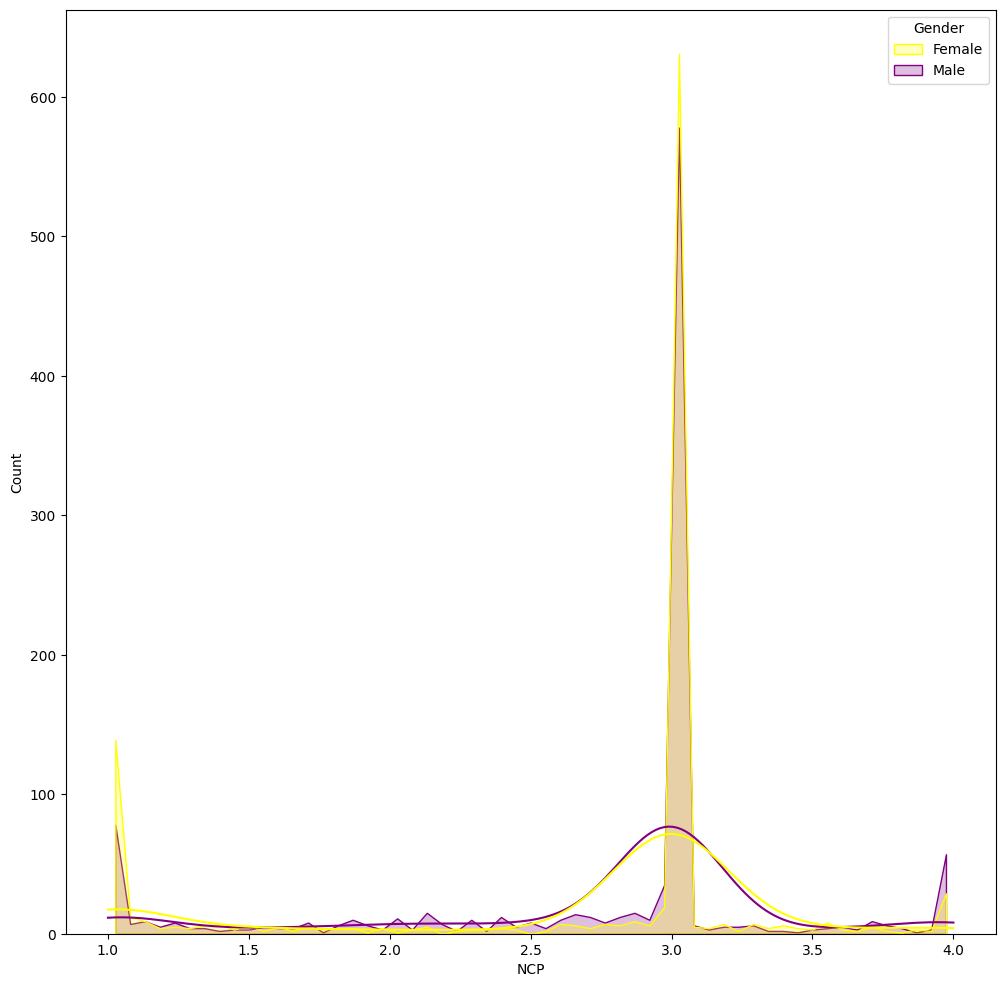

In [14]:
plt.figure(figsize=(12,12))
sns.histplot(df,x='NCP',hue='Gender',element='poly',palette=['yellow','purple'],kde=True)

* MOST PEOPLE HAVE 3 MAIN MEALS A DAY, WITH COUNT SLIGHTLY HIGHER FOR FEMALES

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='Age', ylabel='Count'>

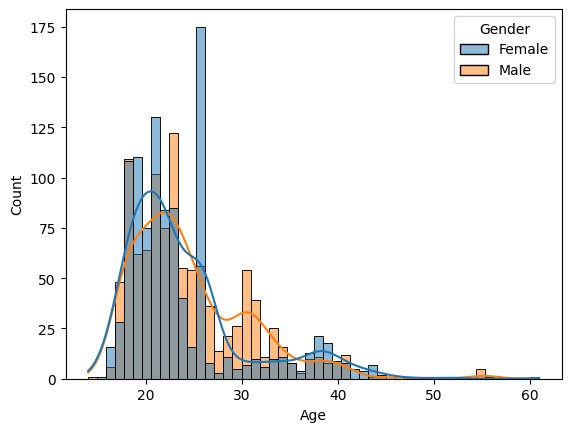

In [15]:
sns.histplot(df,x='Age',hue='Gender',kde=True)

* MOST OF THE PEOPLE AGE BETWEEN 15-25 (55.04%). FEMALE WITH LESSER AGE ARE MORE AND VICE-VERSA

In [16]:
df_temp=df[(df['Age'] >= 15) & (df['Age'] <= 25)]
(df_temp['Age'].sum()/df['Age'].sum())*100

55.03802479109291

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='Height', ylabel='Count'>

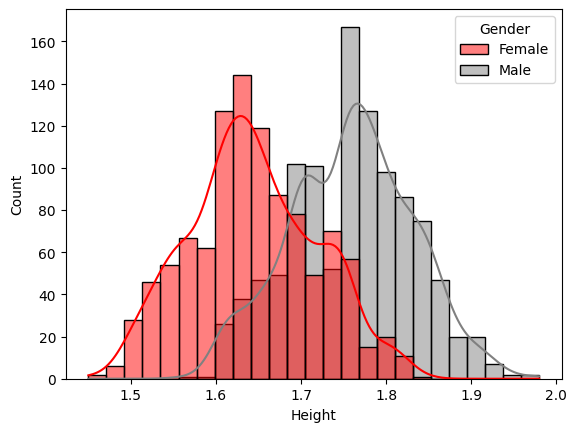

In [17]:
sns.histplot(df,x='Height',hue='Gender',palette=['red','gray'],kde=True)

In [18]:
df_temp=df[(df['Height'] >= 1.6) & (df['Height'] <= 1.8)]
(df_temp['Height'].sum()/df['Height'].sum())*100

72.13830918326445

* 72.13% OF THE PEOPLE HAVE A HEIGHT RANGE OF 1.6-1.8 units. However, Men are taller are expected

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='Weight', ylabel='Count'>

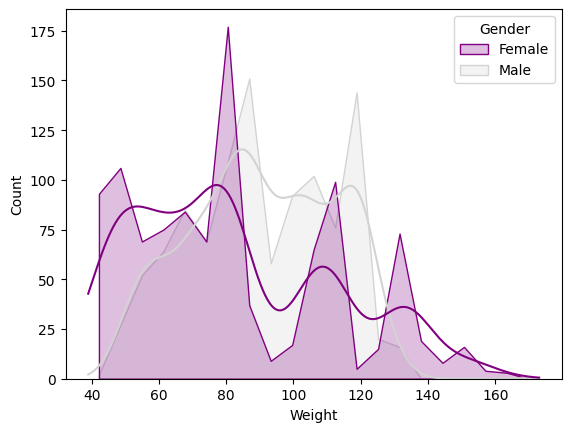

In [19]:
sns.histplot(df,x='Weight',hue='Gender',palette=['purple','lightgray'],element='poly',kde=True)

* MEN WEIGH MORE THAN WOMEN, net mean weight is around 85

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

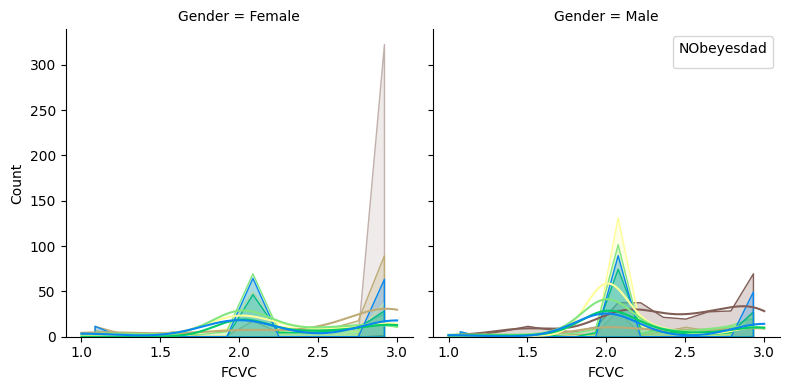

In [20]:
grid = sns.FacetGrid(df, col='Gender', height=4, aspect=1)
grid.map_dataframe(sns.histplot, x='FCVC', hue='NObeyesdad', palette='terrain', element='poly', kde=True)
plt.legend(title='NObeyesdad')

* Men have more OBESITY TYPE II & I
* Female have higher vegetable consumption than men

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping densit

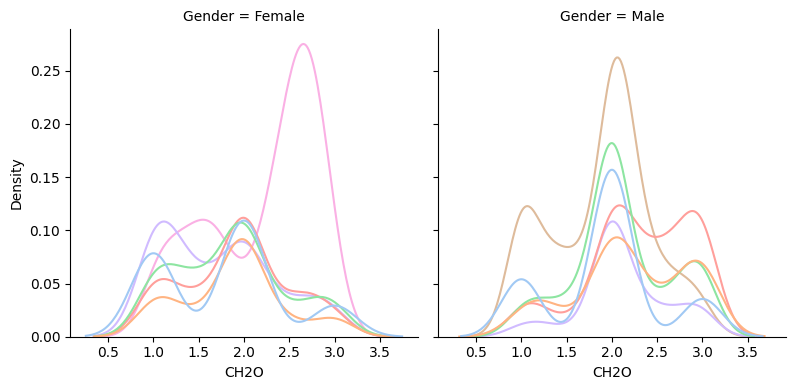

In [21]:
grid = sns.FacetGrid(df, col='Gender', height=4, aspect=1)
grid.map_dataframe(sns.kdeplot,x='CH2O',hue='NObeyesdad',palette='pastel')
grid.add_legend()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='CH2O', ylabel='Density'>

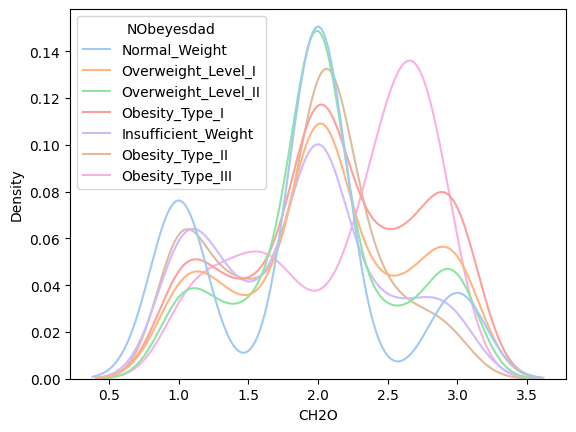

In [22]:
sns.kdeplot(df,x='CH2O',hue='NObeyesdad',palette='pastel')

* Men have no  obesity type III while the case is opposite with Female. 
* Females have no  obesity type II while the case is opposite with Men.
* For obesity type I, men consume more water. Others have almost same distribution for both genders

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='FAF', ylabel='Count'>

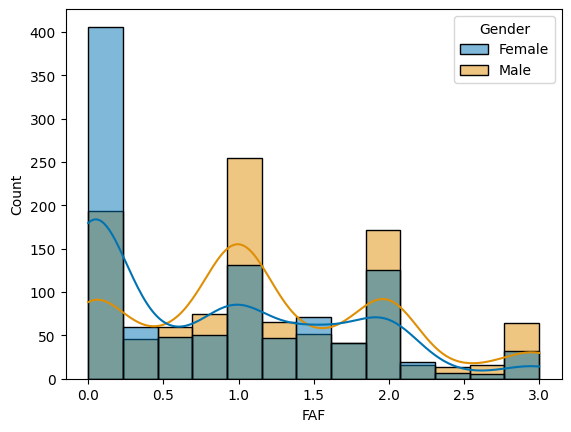

In [23]:
sns.histplot(df,x='FAF',hue='Gender',palette='colorblind',kde=True)

MOST OF THE PEOPLE ARE VERY LESS INVOLVED IS PHYSICAL ACTIVITIES. However, Men are more active

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='TUE', ylabel='Count'>

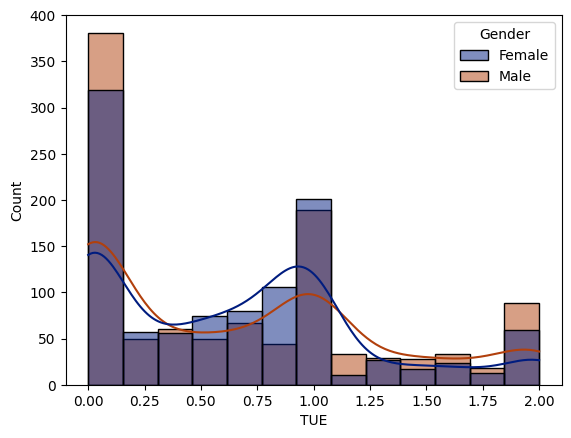

In [24]:
sns.histplot(df,x='TUE',hue='Gender',palette='dark',kde=True)

SURPRISINGLY, USAGE OF TECHNOLOGY DEVICES ARE LESS, Female are more prone than men

In [25]:
labels=df['NObeyesdad'].value_counts().index

([<matplotlib.patches.Wedge at 0x7d18b0ed38e0>,
 [Text(0.9533093018443864, 0.5488181620691581, 'Obesity_Type_I'),
  Text(0.04827659413120045, 1.098940112316905, 'Obesity_Type_III'),
  Text(-0.8480026696961722, 0.7006364764898876, 'Obesity_Type_II'),
  Text(-1.081622638065542, -0.2002310386132419, 'Overweight_Level_I'),
  Text(-0.5509448613808724, -0.9520818030600162, 'Overweight_Level_II'),
  Text(0.3607122048336628, -1.039175974166088, 'Normal_Weight'),
  Text(1.0111033311950712, -0.43320901842670617, 'Insufficient_Weight')],
 [Text(0.5199868919151198, 0.29935536112863165, '16.6%'),
  Text(0.026332687707927516, 0.5994218794455844, '15.3%'),
  Text(-0.4625469107433666, 0.3821653508126659, '14.1%'),
  Text(-0.5899759843993865, -0.1092169301526774, '13.7%'),
  Text(-0.3005153789350213, -0.5193173471236452, '13.7%'),
  Text(0.1967521117274524, -0.5668232586360479, '13.6%'),
  Text(0.5515109079245842, -0.2362958282327488, '12.9%')])

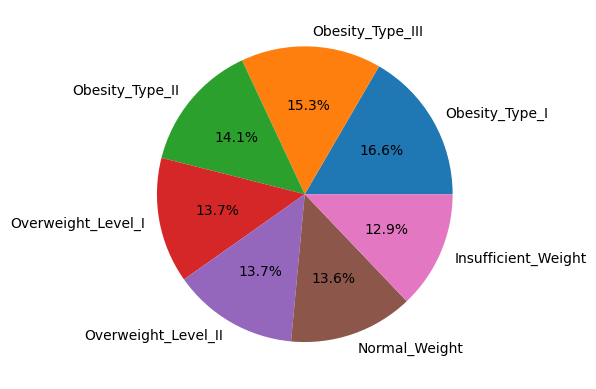

In [26]:
plt.pie(df['NObeyesdad'].value_counts().values,labels=labels,autopct='%1.1f%%')

In [27]:
object_cols

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

<Axes: xlabel='Gender'>

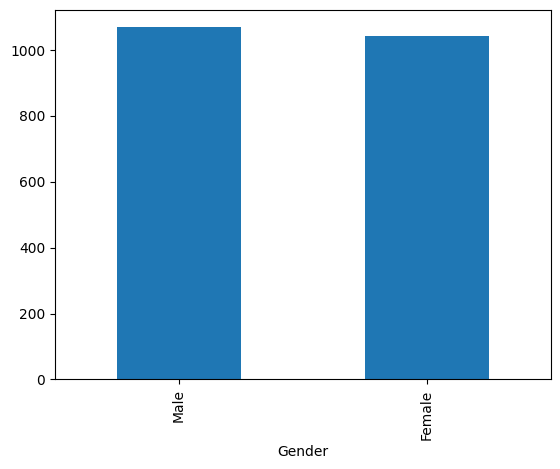

In [28]:
df['Gender'].value_counts().plot(kind='bar')

* FAIRLY BALANCED GENDER RATIO

<Axes: xlabel='family_history_with_overweight', ylabel='count'>

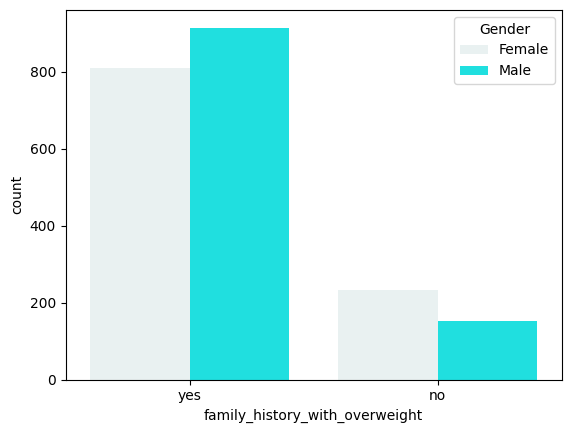

In [29]:
sns.countplot(x='family_history_with_overweight', hue='Gender', data=df, color='cyan')

<Axes: xlabel='FAVC', ylabel='count'>

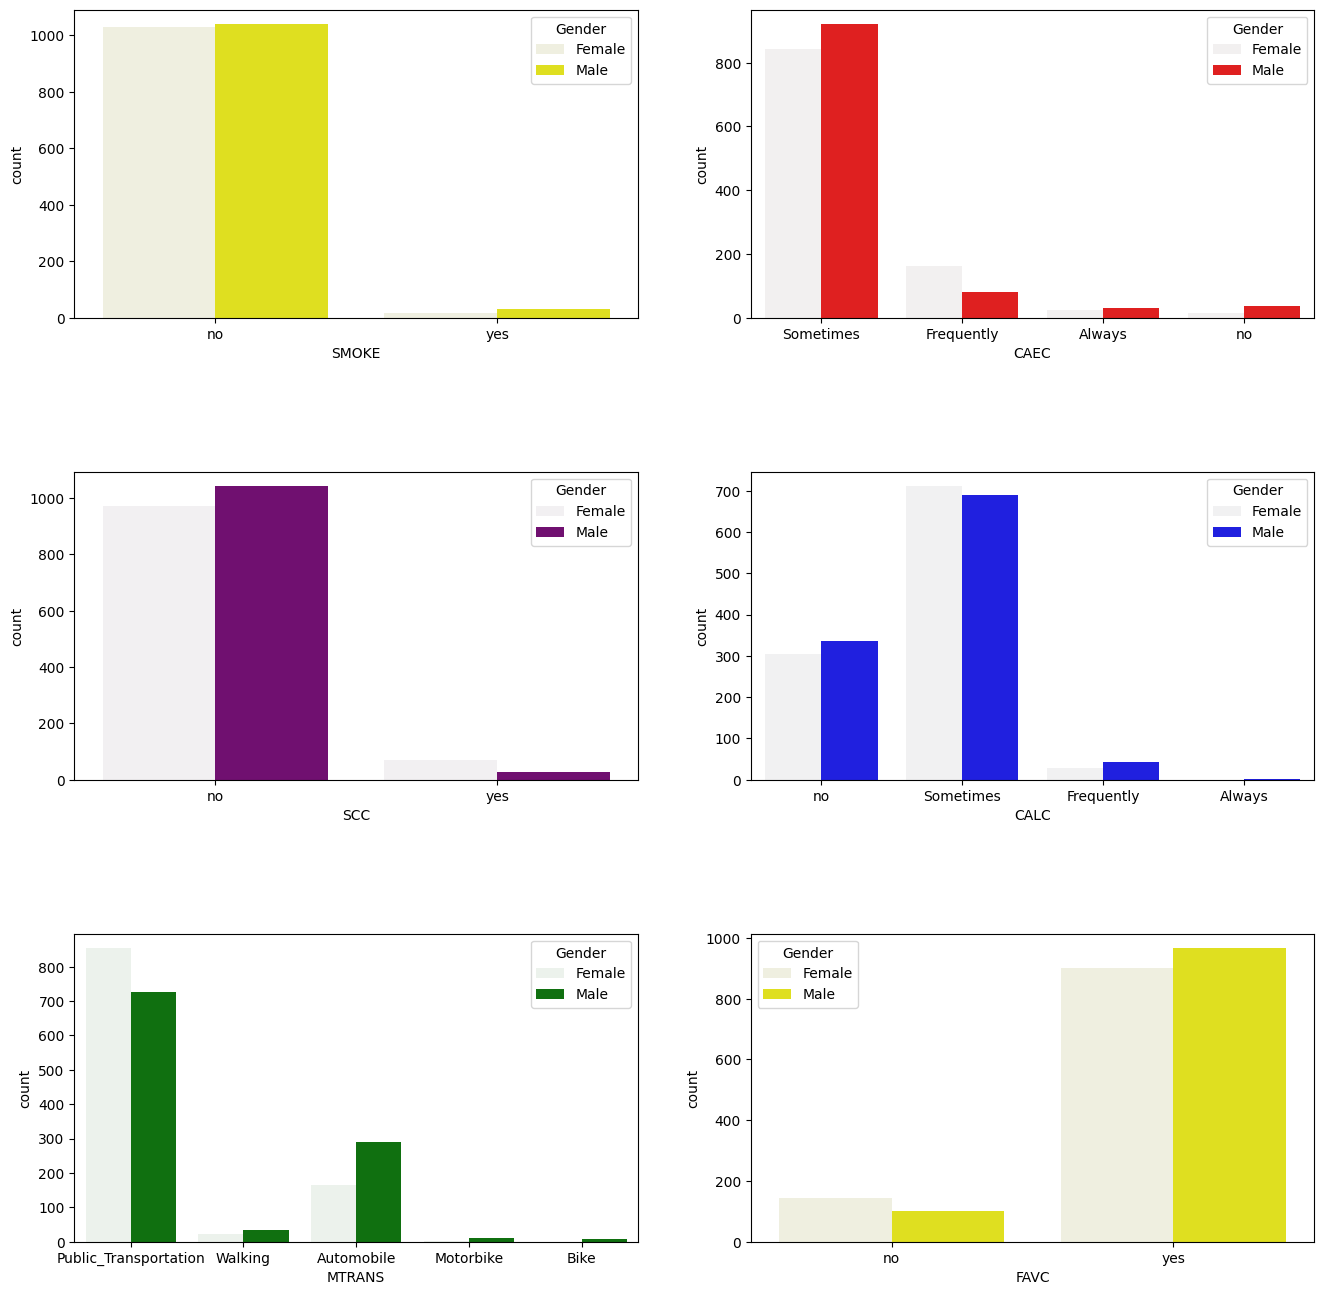

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))
plt.subplots_adjust(hspace=0.5)
sns.countplot(x='SMOKE', hue='Gender', data=df, color='yellow', ax=axes[0, 0])
sns.countplot(x='CAEC', hue='Gender',data=df, color='red', ax=axes[0, 1])
sns.countplot(x='SCC',hue='Gender',data=df, color='purple', ax=axes[1, 0])
sns.countplot(x='CALC',hue='Gender', data=df, color='blue', ax=axes[1, 1])
sns.countplot(x='MTRANS',hue='Gender', data=df, color='green', ax=axes[2, 0])
sns.countplot(x='FAVC',hue='Gender',data=df, color='yellow', ax=axes[2, 1])


* MOST OF THE PEOPLE DO NOT SMOKE
* MOST PEOPLE "SOMETIMES" HAVE FOOD B/W MEALS(Female<Male)
* MOST FAMILIES HAVE FREQUENT CONSUMPTION OF HIGH CALORIE FOODS(Female<Male)
* MOST OF THE FAMILIES HAVE A HISTORY OF OVERWEIGHT(Male>Female)
* MOST OF THE PEOPLE DO NOT MONITOR CALORIE CONSUMPTION.Female however track more than men.
* MOST OF THE PEOPLE USE PUBLIC TRANSPORTATION(Female>Male), WHILE OTHERS MAINLY USE AUTOMOBILES(Male>Female)
* MOST OF THE PEOPLE "SOMETIMES" CONSUME ALCOHOL(Female>Male)

In [31]:
df[df['Age']>=35]['CALC'].value_counts()

CALC
Sometimes     95
no            60
Frequently    16
Name: count, dtype: int64

In [32]:
df['CALC'].value_counts()

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

<Axes: xlabel='CALC', ylabel='Age'>

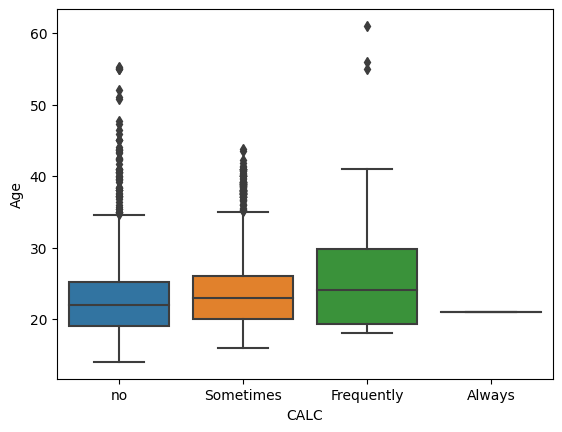

In [33]:
sns.boxplot(df,y='Age',x='CALC')

*  MOST OF THE PEOPLE CONSUMING ALCOHOL LIE UNDER THE AGE OF 35 AND ABOVE 20

<Axes: xlabel='SMOKE', ylabel='Age'>

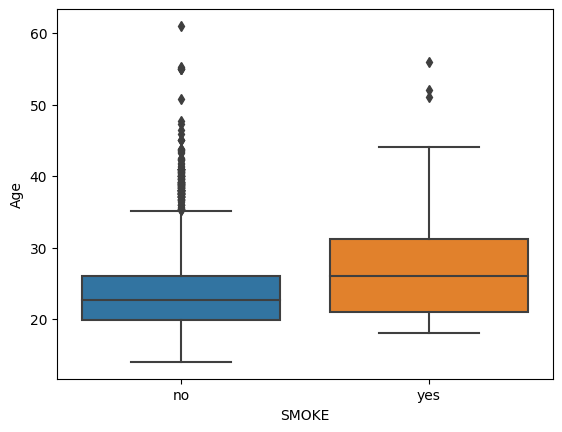

In [34]:
sns.boxplot(df,y='Age',x='SMOKE')

In [35]:
df[(df['Age']>=20)&(df['Age']<=35)]['SMOKE'].value_counts()

SMOKE
no     1370
yes      36
Name: count, dtype: int64

In [36]:
df[df['SMOKE']=='yes']['SMOKE'].value_counts()

SMOKE
yes    44
Name: count, dtype: int64

* 81% OF SMOKERS AGE B/W 20 TO 35

<Axes: xlabel='Age', ylabel='Weight'>

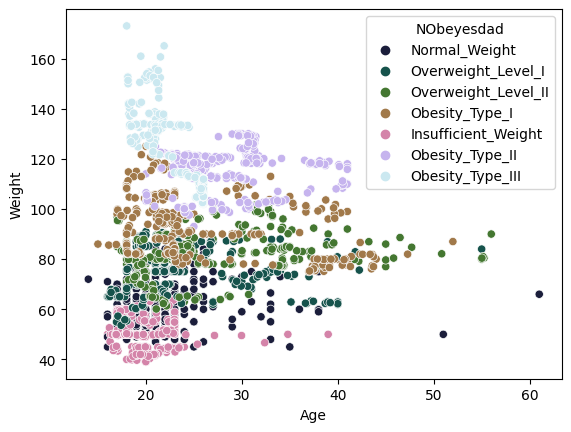

In [37]:
sns.scatterplot(df,x='Age',y='Weight',hue='NObeyesdad',palette='cubehelix')

* PEOPLE WITH INSUFFICIENT WEIGHT OR WITH OBESITY TYPE III MAINLY FALL UNDER LOWER AGE CATEGORY(<25)

In [38]:
object_cols

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

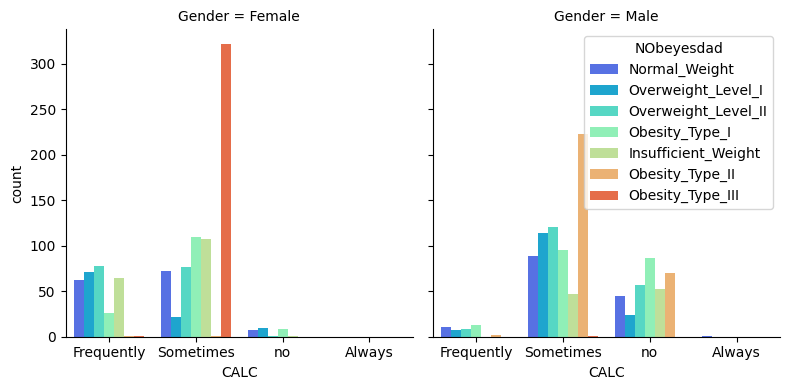

In [39]:
grid = sns.FacetGrid(df, col='Gender', height=4, aspect=1)
grid.map_dataframe(sns.countplot, x='CALC', hue='NObeyesdad', palette='rainbow')
plt.legend(title='NObeyesdad')

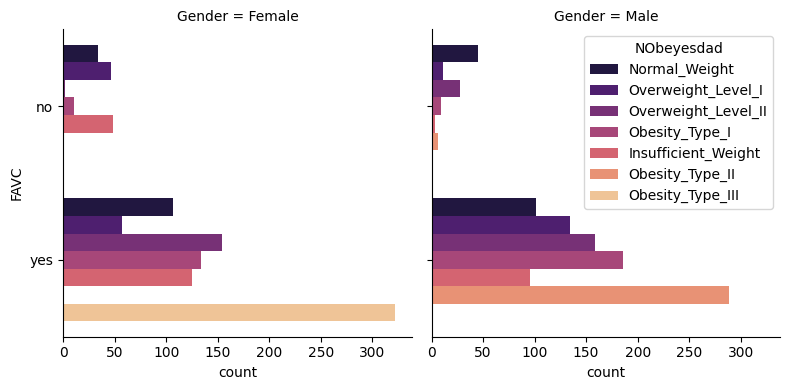

In [40]:
grid = sns.FacetGrid(df, col='Gender', height=4, aspect=1)
grid.map_dataframe(sns.countplot, y='FAVC', hue='NObeyesdad', palette='magma')
plt.legend(title='NObeyesdad')

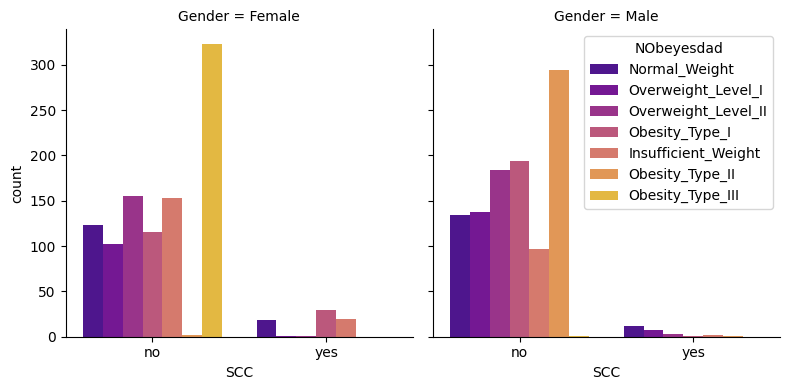

In [41]:
grid = sns.FacetGrid(df, col='Gender', height=4, aspect=1)
grid.map_dataframe(sns.countplot, x='SCC', hue='NObeyesdad', palette='plasma')
plt.legend(title='NObeyesdad')

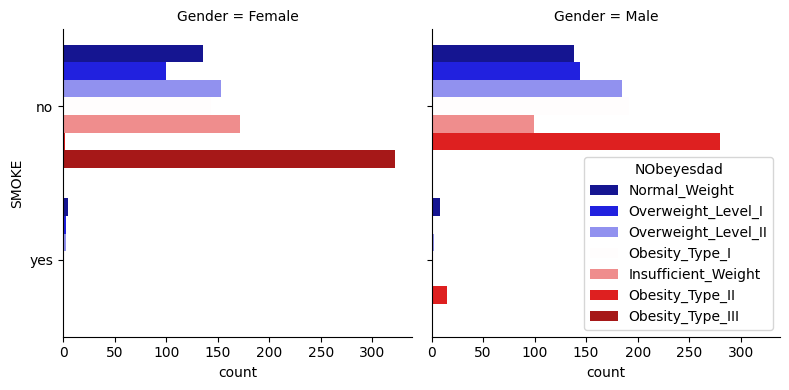

In [42]:
grid = sns.FacetGrid(df, col='Gender', height=4, aspect=1)
grid.map_dataframe(sns.countplot, y='SMOKE', hue='NObeyesdad', palette='seismic')
plt.legend(title='NObeyesdad')

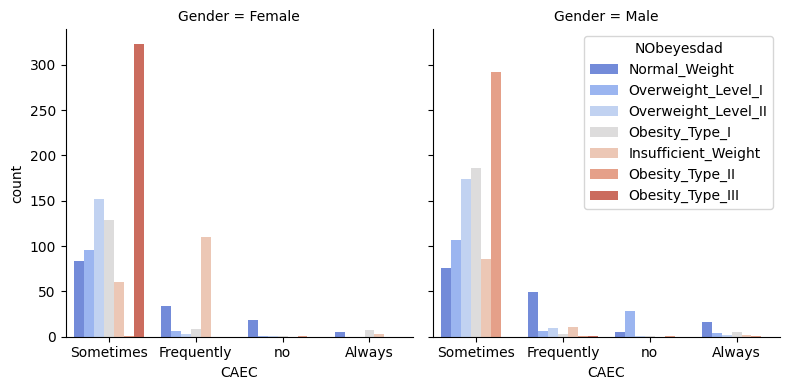

In [43]:
grid = sns.FacetGrid(df, col='Gender', height=4, aspect=1)
grid.map_dataframe(sns.countplot, x='CAEC', hue='NObeyesdad', palette='coolwarm')
plt.legend(title='NObeyesdad')

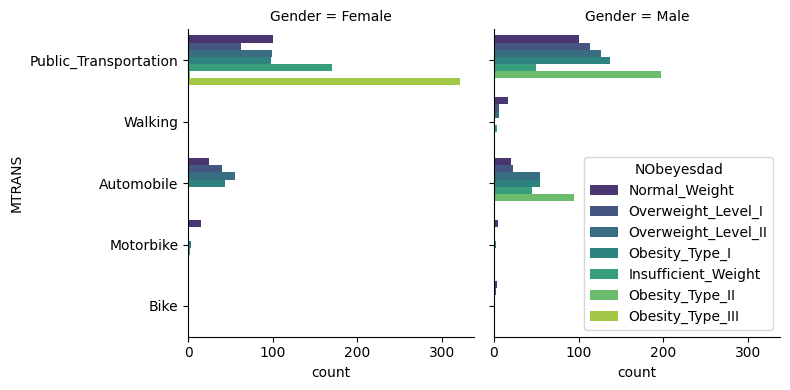

In [44]:
grid = sns.FacetGrid(df, col='Gender', height=4, aspect=1)
grid.map_dataframe(sns.countplot, y='MTRANS', hue='NObeyesdad', palette='viridis')
plt.legend(title='NObeyesdad')

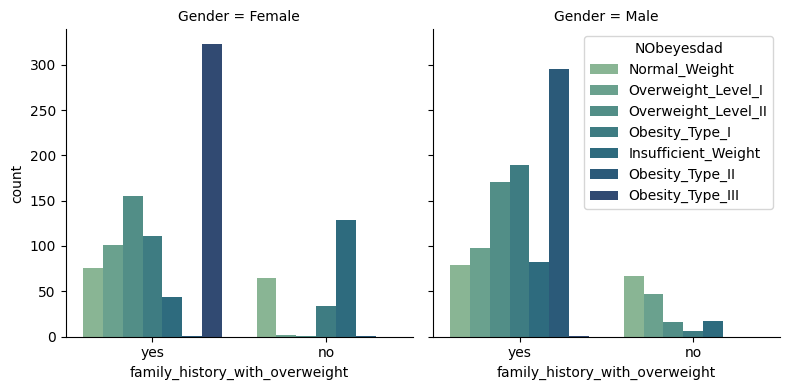

In [45]:
grid = sns.FacetGrid(df, col='Gender', height=4, aspect=1)
grid.map_dataframe(sns.countplot, x='family_history_with_overweight', hue='NObeyesdad', palette='crest')
plt.legend(title='NObeyesdad')

* We can surely conclude, Female have obesity type III and men type II
* Females with Insufficient weight tend to have food more frequently b/w meals than men
* Men with frequent consumption of high calorific food are more overweight
* Count of Men with Overweight Lev II and Obesity Lev I are more with family overweight history and count of Women with insufficient weight is more

# Valuable Insights

* not many outliers in the dataset, although age column has some
* most people have 3 main meals a day, with count slightly higher for females
* most of the people age between 15-25 (55.04%). female with lesser age are more and vice-versa
* 72.13% of the people have a height range of 1.6-1.8 units. however, men are taller are expected
* men weigh more than women, net mean weight is around 85
* men have more obesity type II & I
* female have higher vegetable consumption than men
* men have no obesity type III while the case is opposite with female.
* females have no obesity type II while the case is opposite with men.
* for obesity type I, men consume more water. others have almost the same distribution for both genders
* most of the people are very less involved in physical activities. however, men are more active
* surprisingly, usage of technology devices is less, female are more prone than men
* fairly balanced gender ratio
* most of the people do not smoke
* most people "sometimes" have food b/w meals(female < male)
* most families have frequent consumption of high-calorie foods(female < male)
* most of the families have a history of overweight(male > female)
* most of the people do not monitor calorie consumption. female, however, track more than men.
* most of the people use public transportation(female > male), while others mainly use automobiles(male > female)
* most of the people "sometimes" consume alcohol(female > male)
* most of the people consuming alcohol lie under the age of 35 and above 20
* people with insufficient weight or with obesity type III mainly fall under the lower age category(<25)
* we can surely conclude, female have obesity type III and men type II
* females with insufficient weight tend to have food more frequently b/w meals than men
* men with frequent consumption of high calorific food are more overweight
* count of men with overweight Lev II and obesity Lev I are more with family overweight history, and count of women with insufficient weight is more

# Feature Engineering

In [46]:
X = train.drop(['id', 'NObeyesdad'], axis=1)
y = train['NObeyesdad']
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

**Scaling**

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_val[num_cols]=scaler.transform(X_val[num_cols])
test[num_cols]=scaler.transform(test[num_cols])

In [48]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
9958,Male,0.063830,0.608755,0.460108,yes,yes,1.000000,0.666667,Always,no,0.500000,no,1.000000,0.500000,no,Automobile
7841,Male,0.184417,0.577155,0.125952,yes,yes,0.500000,1.000000,Sometimes,no,0.500000,no,0.666667,0.500000,no,Public_Transportation
9293,Male,0.166773,0.703620,0.658629,yes,yes,1.000000,0.626939,Sometimes,no,0.322669,no,0.246627,0.000000,Sometimes,Public_Transportation
15209,Female,0.574468,0.247307,0.325249,yes,yes,0.500000,0.666667,Sometimes,no,0.000000,no,0.000000,0.000000,Sometimes,Automobile
16515,Male,0.191489,0.665826,0.444243,yes,no,1.000000,0.666667,Sometimes,no,1.000000,no,0.666667,0.500000,Frequently,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,Female,0.085106,0.518319,0.328761,yes,yes,0.814396,0.520965,Sometimes,no,0.422323,no,0.096011,0.361138,no,Public_Transportation
11964,Male,0.170213,0.570708,0.444243,yes,no,1.000000,0.666667,Sometimes,no,0.500000,no,1.000000,0.000000,Sometimes,Public_Transportation
5390,Male,0.148936,0.323401,0.230054,no,yes,0.500000,0.666667,Always,no,1.000000,no,0.666667,0.000000,Sometimes,Public_Transportation
860,Female,0.255319,0.380710,0.578623,yes,yes,1.000000,0.666667,Sometimes,no,0.885366,no,0.000000,0.118653,Sometimes,Public_Transportation


In [49]:
X_val

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
10317,Female,0.255319,0.378908,0.578570,yes,yes,1.000000,0.666667,Sometimes,no,0.146239,no,0.021755,0.355666,Sometimes,Public_Transportation
4074,Male,0.085106,0.570708,0.325249,no,yes,0.500000,0.666667,Sometimes,no,0.500000,no,0.333333,0.500000,Sometimes,Public_Transportation
9060,Female,0.199155,0.501043,0.362710,yes,yes,0.940081,0.666667,Sometimes,no,0.923632,no,0.666667,0.001300,no,Public_Transportation
11286,Male,0.340469,0.419788,0.579105,yes,yes,0.286018,0.666667,Sometimes,no,0.501782,no,0.000000,0.057229,Sometimes,Public_Transportation
8254,Male,0.063830,0.304378,0.087262,no,yes,0.500000,0.666667,Sometimes,no,0.500000,no,0.000000,1.000000,no,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20286,Female,0.042553,0.209260,0.095195,no,yes,0.500000,0.666667,Always,no,0.500000,no,0.333333,0.500000,Sometimes,Public_Transportation
8233,Male,0.085106,0.627779,0.547370,yes,yes,0.500000,0.000000,Sometimes,no,1.000000,no,0.333333,0.000000,Sometimes,Public_Transportation
11518,Female,0.184978,0.338445,0.341115,yes,yes,0.459125,0.000000,Sometimes,no,0.499054,no,0.000000,0.691453,Sometimes,Public_Transportation
7947,Male,0.408206,0.717132,0.380779,yes,yes,0.500000,0.000000,Sometimes,no,0.587816,no,0.666667,0.000000,Sometimes,Automobile


**Encoding**

In [50]:
object_cols

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [51]:
X_val['CALC'].value_counts()

CALC
Sometimes     3003
no            1035
Frequently     114
Name: count, dtype: int64

In [52]:
test['CALC'] = test['CALC'].replace('Always', 'Frequently')
test['CALC'].value_counts()

CALC
Sometimes     9979
no            3513
Frequently     348
Name: count, dtype: int64

In [53]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit(X_train[object_cols])
encoded_cols = list(encoder.get_feature_names_out(object_cols))
X_train[encoded_cols] = encoder.transform(X_train[object_cols])
X_val[encoded_cols] = encoder.transform(X_val[object_cols])
test[encoded_cols] = encoder.transform(test[object_cols])

In [54]:
test.drop(columns='id',inplace=True)

In [55]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_val=encoder.transform(y_val)

In [56]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
9958,1.0,0.063830,0.608755,0.460108,1.0,1.0,1.000000,0.666667,0.0,0.0,0.500000,0.0,1.000000,0.500000,2.0,0.0
7841,1.0,0.184417,0.577155,0.125952,1.0,1.0,0.500000,1.000000,2.0,0.0,0.500000,0.0,0.666667,0.500000,2.0,3.0
9293,1.0,0.166773,0.703620,0.658629,1.0,1.0,1.000000,0.626939,2.0,0.0,0.322669,0.0,0.246627,0.000000,1.0,3.0
15209,0.0,0.574468,0.247307,0.325249,1.0,1.0,0.500000,0.666667,2.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.0
16515,1.0,0.191489,0.665826,0.444243,1.0,0.0,1.000000,0.666667,2.0,0.0,1.000000,0.0,0.666667,0.500000,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,0.085106,0.518319,0.328761,1.0,1.0,0.814396,0.520965,2.0,0.0,0.422323,0.0,0.096011,0.361138,2.0,3.0
11964,1.0,0.170213,0.570708,0.444243,1.0,0.0,1.000000,0.666667,2.0,0.0,0.500000,0.0,1.000000,0.000000,1.0,3.0
5390,1.0,0.148936,0.323401,0.230054,0.0,1.0,0.500000,0.666667,0.0,0.0,1.000000,0.0,0.666667,0.000000,1.0,3.0
860,0.0,0.255319,0.380710,0.578623,1.0,1.0,1.000000,0.666667,2.0,0.0,0.885366,0.0,0.000000,0.118653,1.0,3.0


In [57]:
X_val

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
10317,0.0,0.255319,0.378908,0.578570,1.0,1.0,1.000000,0.666667,2.0,0.0,0.146239,0.0,0.021755,0.355666,1.0,3.0
4074,1.0,0.085106,0.570708,0.325249,0.0,1.0,0.500000,0.666667,2.0,0.0,0.500000,0.0,0.333333,0.500000,1.0,3.0
9060,0.0,0.199155,0.501043,0.362710,1.0,1.0,0.940081,0.666667,2.0,0.0,0.923632,0.0,0.666667,0.001300,2.0,3.0
11286,1.0,0.340469,0.419788,0.579105,1.0,1.0,0.286018,0.666667,2.0,0.0,0.501782,0.0,0.000000,0.057229,1.0,3.0
8254,1.0,0.063830,0.304378,0.087262,0.0,1.0,0.500000,0.666667,2.0,0.0,0.500000,0.0,0.000000,1.000000,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20286,0.0,0.042553,0.209260,0.095195,0.0,1.0,0.500000,0.666667,0.0,0.0,0.500000,0.0,0.333333,0.500000,1.0,3.0
8233,1.0,0.085106,0.627779,0.547370,1.0,1.0,0.500000,0.000000,2.0,0.0,1.000000,0.0,0.333333,0.000000,1.0,3.0
11518,0.0,0.184978,0.338445,0.341115,1.0,1.0,0.459125,0.000000,2.0,0.0,0.499054,0.0,0.000000,0.691453,1.0,3.0
7947,1.0,0.408206,0.717132,0.380779,1.0,1.0,0.500000,0.000000,2.0,0.0,0.587816,0.0,0.666667,0.000000,1.0,0.0


# Model Building

In [58]:
model1=Sequential()

In [59]:
model1.add(Dense(16,activation = 'relu',input_dim = 16))
model1.add(Dense(8,activation = 'relu'))
model1.add(Dense(7,activation = 'softmax'))

In [60]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 7)                 63        
                                                                 
Total params: 471 (1.84 KB)
Trainable params: 471 (1.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=15,
    restore_best_weights=True,
)

In [62]:
model1.compile(loss="sparse_categorical_crossentropy",optimizer = "Adam",metrics=['accuracy'])

In [63]:
model1.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/100


I0000 00:00:1707249198.781326      71 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


519/519 [==============================] - 4s 4ms/step - loss: 1.7214 - accuracy: 0.3267 - val_loss: 1.3835 - val_accuracy: 0.4795
Epoch 2/100
519/519 [==============================] - 2s 3ms/step - loss: 1.1510 - accuracy: 0.5514 - val_loss: 0.9807 - val_accuracy: 0.5850
Epoch 3/100
519/519 [==============================] - 2s 3ms/step - loss: 0.8643 - accuracy: 0.6564 - val_loss: 0.7623 - val_accuracy: 0.7016
Epoch 4/100
519/519 [==============================] - 2s 4ms/step - loss: 0.6997 - accuracy: 0.7406 - val_loss: 0.6322 - val_accuracy: 0.7782
Epoch 5/100
519/519 [==============================] - 2s 3ms/step - loss: 0.5961 - accuracy: 0.7923 - val_loss: 0.5492 - val_accuracy: 0.8153
Epoch 6/100
519/519 [==============================] - 2s 3ms/step - loss: 0.5347 - accuracy: 0.8152 - val_loss: 0.5036 - val_accuracy: 0.8266
Epoch 7/100
519/519 [==============================] - 2s 3ms/step - loss: 0.4980 - accuracy: 0.8281 - val_loss: 0.4864 - val_accuracy: 0.8220
Epoch 8/100

In [64]:
history=model1.history.history

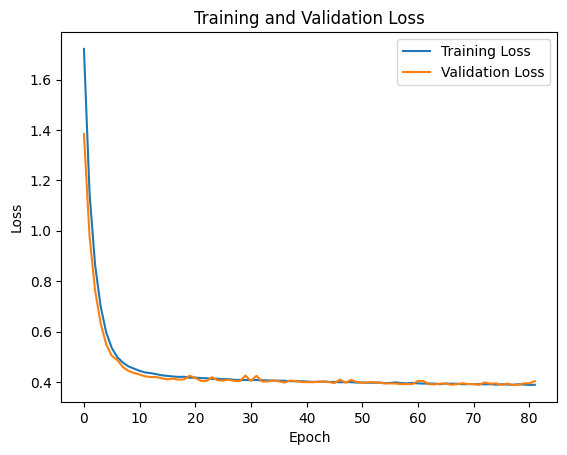

In [65]:
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

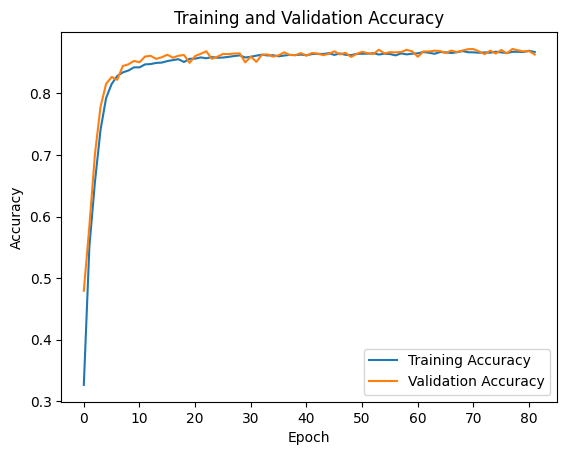

In [66]:
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [67]:
pred=model1.predict(X_val)
pred

130/130 [==============================] - 0s 1ms/step


array([[1.12050580e-25, 6.66192514e-15, 3.39256134e-03, ...,
        9.92714345e-01, 5.70890357e-09, 4.39256979e-07],
       [1.02857723e-06, 8.20176750e-02, 3.57058272e-03, ...,
        2.99948315e-05, 7.56969452e-01, 1.57369643e-01],
       [3.43001495e-11, 1.10036664e-04, 6.72937095e-01, ...,
        1.96408643e-03, 3.30097713e-02, 2.91978478e-01],
       ...,
       [2.04846405e-12, 1.80471725e-05, 8.68742228e-01, ...,
        7.41562326e-05, 1.93207897e-02, 1.11844309e-01],
       [8.85060203e-08, 1.13245258e-02, 3.78479175e-02, ...,
        1.11640663e-09, 3.73171985e-01, 5.76664746e-01],
       [2.24255619e-08, 1.19057428e-02, 2.82425173e-02, ...,
        8.47754109e-07, 4.67635572e-01, 4.92029965e-01]], dtype=float32)

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [69]:
y_pred = np.argmax(pred, axis=1)
y_pred

array([4, 5, 2, ..., 2, 6, 6])

In [70]:
y_val

array([4, 5, 2, ..., 2, 5, 6])

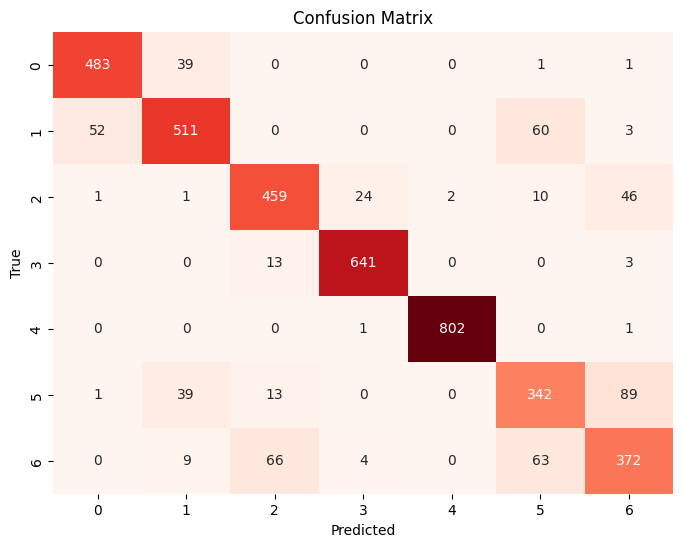

In [71]:
cf = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='g', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [72]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       524
           1       0.85      0.82      0.83       626
           2       0.83      0.85      0.84       543
           3       0.96      0.98      0.97       657
           4       1.00      1.00      1.00       804
           5       0.72      0.71      0.71       484
           6       0.72      0.72      0.72       514

    accuracy                           0.87      4152
   macro avg       0.85      0.86      0.85      4152
weighted avg       0.87      0.87      0.87      4152



# Using Keras Tuner

In [73]:
def build_model(hp):
    model = Sequential()
    c = 0
    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
        if c == 0:
            model.add(Dense(hp.Int('units'+str(i), min_value=32, max_value=256,step=16),
                            activation=hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid']),
                            input_dim=16))
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5])))
            c = 1
        else:
            model.add(Dense(hp.Int('units'+str(i), min_value=16, max_value=132,step=8),
                            activation=hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid'])))
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5])))
    model.add(Dense(7, activation='softmax'))
    model.compile(optimizer=hp.Choice('optimizer', values=['rmsprop', 'Adam', 'SGD', 'momentum', 'nadam', 'adadelta']),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [74]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=5,
                        directory='obesity_comp',
                        project_name='tuner_obesity_3')

In [75]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_val,y_val))

Trial 5 Complete [00h 00m 13s]
val_accuracy: 0.194123312830925

Best val_accuracy So Far: 0.8328516483306885
Total elapsed time: 00h 01m 10s


In [76]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'units0': 256,
 'activation0': 'tanh',
 'dropout0': 0.2,
 'optimizer': 'rmsprop',
 'units1': 16,
 'activation1': 'relu',
 'dropout1': 0.1,
 'units2': 16,
 'activation2': 'relu',
 'dropout2': 0.1}

In [77]:
model=tuner.get_best_models(num_models=1)[0]

In [78]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),initial_epoch=5,epochs=100)

Epoch 6/100
519/519 [==============================] - 3s 4ms/step - loss: 0.5885 - accuracy: 0.7673 - val_loss: 0.4497 - val_accuracy: 0.8374
Epoch 7/100
519/519 [==============================] - 2s 4ms/step - loss: 0.5723 - accuracy: 0.7797 - val_loss: 0.4396 - val_accuracy: 0.8473
Epoch 8/100
519/519 [==============================] - 2s 4ms/step - loss: 0.5545 - accuracy: 0.7920 - val_loss: 0.4331 - val_accuracy: 0.8502
Epoch 9/100
519/519 [==============================] - 2s 4ms/step - loss: 0.5392 - accuracy: 0.7971 - val_loss: 0.4619 - val_accuracy: 0.8425
Epoch 10/100
519/519 [==============================] - 2s 4ms/step - loss: 0.5347 - accuracy: 0.8027 - val_loss: 0.4487 - val_accuracy: 0.8350
Epoch 11/100
519/519 [==============================] - 2s 4ms/step - loss: 0.5292 - accuracy: 0.8025 - val_loss: 0.4149 - val_accuracy: 0.8610
Epoch 12/100
519/519 [==============================] - 2s 4ms/step - loss: 0.5247 - accuracy: 0.8027 - val_loss: 0.4103 - val_accuracy: 0.8

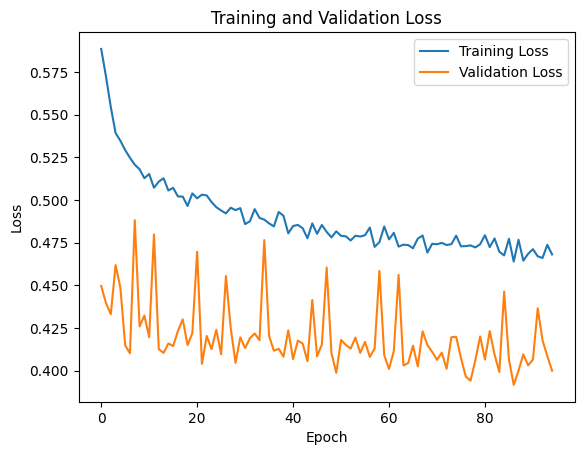

In [79]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

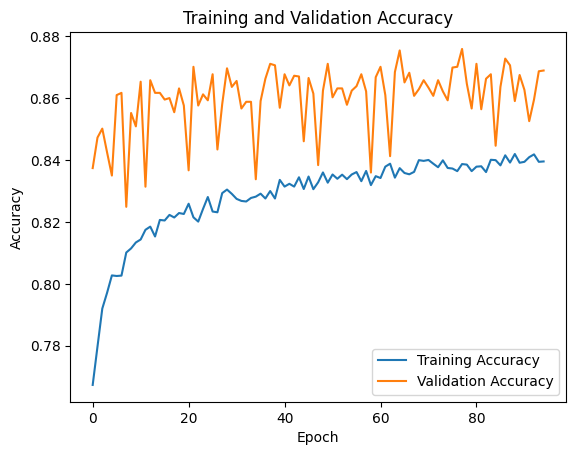

In [80]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [81]:
pred=model.predict(X_val)
pred

130/130 [==============================] - 0s 1ms/step


array([[4.6297057e-35, 1.1685344e-27, 1.5500378e-06, ..., 9.9999845e-01,
        1.1929721e-29, 6.3072354e-20],
       [9.3793729e-05, 2.6260890e-02, 7.9930034e-03, ..., 4.7330946e-06,
        7.4336916e-01, 2.2220264e-01],
       [5.0294511e-06, 8.2201121e-04, 6.4709735e-01, ..., 5.5563676e-05,
        4.3679185e-02, 3.0217180e-01],
       ...,
       [1.8343297e-08, 8.4535146e-05, 9.3647325e-01, ..., 6.7426712e-04,
        1.4660553e-02, 4.7780439e-02],
       [2.8277286e-06, 5.1048986e-04, 7.5555466e-02, ..., 3.1305472e-08,
        2.2833462e-01, 6.9365114e-01],
       [5.7650224e-05, 1.4254380e-02, 5.2881360e-02, ..., 6.3566375e-05,
        5.2245665e-01, 4.0943944e-01]], dtype=float32)

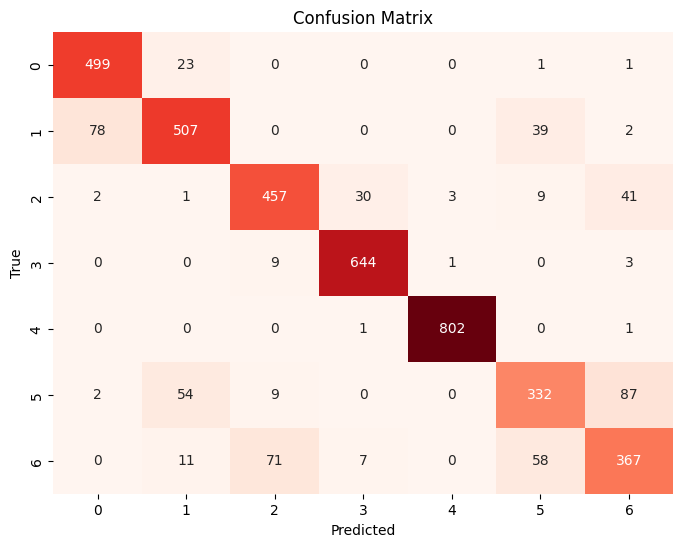

In [82]:
y_pred = np.argmax(pred, axis=1)
y_pred
cf = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='g', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [83]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       524
           1       0.85      0.81      0.83       626
           2       0.84      0.84      0.84       543
           3       0.94      0.98      0.96       657
           4       1.00      1.00      1.00       804
           5       0.76      0.69      0.72       484
           6       0.73      0.71      0.72       514

    accuracy                           0.87      4152
   macro avg       0.85      0.85      0.85      4152
weighted avg       0.87      0.87      0.87      4152



In [84]:
y_pred_final=model.predict(test).argmax(axis=1)
y_pred_final

433/433 [==============================] - 1s 2ms/step


array([3, 5, 4, ..., 0, 0, 3])

In [85]:
submission['NObeyesdad']=encoder.inverse_transform(y_pred_final)
submission

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Insufficient_Weight


In [86]:
submission.to_csv("submission.csv", index=False)
submission

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Insufficient_Weight


# The End
 I hope you enjoyed going through this notebook. Any suggestions or feedback would be highly appreciated, Thankyou